In [3]:
import torch
from torchvision import models

# Load pre-trained ResNet-18
model = models.resnet18(pretrained=True)

# Modify the final layer for 7 classes
num_classes = 7
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

# Switch to training mode
model.train()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 195MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [2]:
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the final layer
for param in model.fc.parameters():
    param.requires_grad = True


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import zipfile
import os

# Path to the uploaded zip file in Google Drive
zip_path = '/content/drive/MyDrive/archive (2).zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# Check the extracted files
os.listdir('/content/dataset')

['train', 'test']

In [11]:
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Define transforms for train and test sets
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = ImageFolder('/content/dataset/train', transform=train_transforms)
test_dataset = ImageFolder('/content/dataset/test', transform=test_transforms)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Using device: cuda


<ipython-input-13-993ed40bc9ba>:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(saved_weights_path))


Loaded saved model weights from /content/drive/MyDrive/resnet18_final_weights.pth
Epoch 1/30, Loss: 1.2742, Train Accuracy: 52.86%, Test Accuracy: 58.40%
Epoch 2/30, Loss: 1.0557, Train Accuracy: 60.62%, Test Accuracy: 60.63%
Epoch 3/30, Loss: 0.9464, Train Accuracy: 64.59%, Test Accuracy: 59.28%
Epoch 4/30, Loss: 0.8466, Train Accuracy: 68.70%, Test Accuracy: 63.50%
Epoch 5/30, Loss: 0.7327, Train Accuracy: 72.86%, Test Accuracy: 62.75%
Epoch 6/30, Loss: 0.5858, Train Accuracy: 78.48%, Test Accuracy: 63.88%
Epoch 7/30, Loss: 0.4167, Train Accuracy: 85.05%, Test Accuracy: 64.66%
Epoch 8/30, Loss: 0.1213, Train Accuracy: 96.33%, Test Accuracy: 66.40%
Epoch 9/30, Loss: 0.0421, Train Accuracy: 98.80%, Test Accuracy: 66.06%
Epoch 10/30, Loss: 0.0219, Train Accuracy: 99.48%, Test Accuracy: 65.99%
Epoch 11/30, Loss: 0.0227, Train Accuracy: 99.54%, Test Accuracy: 66.30%
Epoch 12/30, Loss: 0.0182, Train Accuracy: 99.62%, Test Accuracy: 66.72%
Epoch 13/30, Loss: 0.0151, Train Accuracy: 99.62%, 

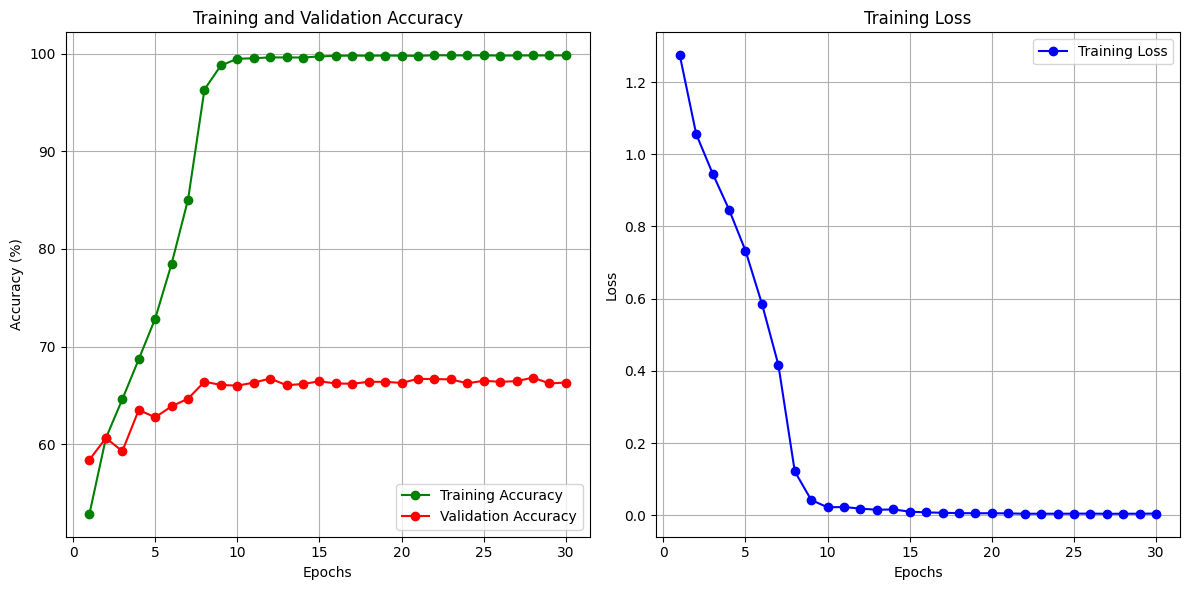

Model saved to /content/drive/MyDrive/resnet18_with_scheduler.pth


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define transforms for train and test sets (you've already defined these)
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets (You already ran this part)
train_dataset = ImageFolder('/content/dataset/train', transform=train_transforms)
test_dataset = ImageFolder('/content/dataset/test', transform=test_transforms)

# Create dataloaders (You already ran this part)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load pretrained ResNet-18
model = models.resnet18(pretrained=True)  # Ensure using pretrained weights
num_features = model.fc.in_features

# Ensure output layer matches the number of classes in your dataset
model.fc = nn.Linear(num_features, len(train_dataset.classes))
model = model.to(device)

# Load saved weights if they exist
saved_weights_path = '/content/drive/MyDrive/resnet18_final_weights.pth'
try:
    model.load_state_dict(torch.load(saved_weights_path))
    print(f"Loaded saved model weights from {saved_weights_path}")
except FileNotFoundError:
    print("No saved weights found, starting training from scratch.")

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # No weight decay (for now)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)  # Learning rate scheduler

# Training and evaluation function
def train_with_scheduler(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=30):
    train_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        # Training
        model.train()
        correct_train = 0
        total_train = 0
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = 100 * correct_train / total_train
        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_accuracy = 100 * correct_test / total_test
        test_accuracies.append(test_accuracy)

        # Step the scheduler
        scheduler.step()

        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, "
              f"Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")

    return train_losses, train_accuracies, test_accuracies

# Train the model
train_losses, train_accuracies, test_accuracies = train_with_scheduler(
    model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=30
)

# Plot training loss and accuracies
def plot_metrics(train_losses, train_accuracies, test_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 6))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_accuracies, label='Training Accuracy', color='green', marker='o')
    plt.plot(epochs, test_accuracies, label='Validation Accuracy', color='red', marker='o')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid()

    # Plot training loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_losses, label='Training Loss', color='blue', marker='o')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Plot metrics
plot_metrics(train_losses, train_accuracies, test_accuracies)

# Save the updated model
model_save_path = '/content/drive/MyDrive/resnet18_with_scheduler.pth'
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")
